In [1]:
"""
Alunos:
    David Cardoso Yonekura: dcy.eng17@uea.edu.br
    Lucas da Silva Lima: ldsllm.eng@uea.edu.br
    Rafael Barbosa de Carvalho: rbc.eng@uea.edu.br

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

In [2]:
def plotConfigs(X, y, x, line, n, configs, i):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.007),
                         np.arange(y_min, y_max, 0.007))
    axarr = plt.subplot(3,3,i)
    color = np.where(y == 0, 'r', 'b')

    for idx, clf, tt in zip([[0,0]],
                            [n],
                            [configs]):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z)
        Z = Z.reshape(xx.shape)

        axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
        axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
        axarr.set_title(tt)

## Leitura dos dados

É feito um ajuste no vetor X para facilitar o cálculo do viés 

In [3]:
with open('data/data3.txt', 'rb') as file:
    auxFile = file.read()

data3 = np.frombuffer(auxFile)
data3.resize((int(len(data3)/3)), 3)
X = data3[...,0:2] #[[x01,x02], ...]
y = data3[...,2] #[[yd0], [yd1], ...]

X = np.insert(X, 2, 1, axis=1)

## Configurações

In [4]:
configs = [[0.4,-100,100], [0.4,-1,1], [0.4,-0.5,0.5],
          [0.1,-100,100], [0.1,-1,1], [0.1,-0.5,0.5],
          [0.01,-100,100], [0.01,-1,1], [0.01,-0.5,0.5]]


ep_mean = []
fw_mean = []
ep_std = []
fw_std = []

Configuração:  [0.4, -100, 100]
Pesos da última iteração:  [ 61.31897055  -5.19880646 -31.72623247]
Configuração:  [0.4, -1, 1]
Pesos da última iteração:  [ 1.43833593 -0.1648866  -0.65748991]
Configuração:  [0.4, -0.5, 0.5]
Pesos da última iteração:  [ 0.72532108  0.12693403 -0.46740243]
Configuração:  [0.1, -100, 100]
Pesos da última iteração:  [ 67.76779069 -23.43054555 -18.54678086]
Configuração:  [0.1, -1, 1]
Pesos da última iteração:  [ 0.85610255 -0.19518679 -0.30363822]
Configuração:  [0.1, -0.5, 0.5]
Pesos da última iteração:  [ 0.31816206  0.0090616  -0.13598843]
Configuração:  [0.01, -100, 100]
Pesos da última iteração:  [ 84.62633387 -29.33100944 -23.13225987]
Configuração:  [0.01, -1, 1]
Pesos da última iteração:  [ 0.53886668 -0.04215938 -0.14848575]
Configuração:  [0.01, -0.5, 0.5]
Pesos da última iteração:  [ 0.28554644  0.09457676 -0.21381294]


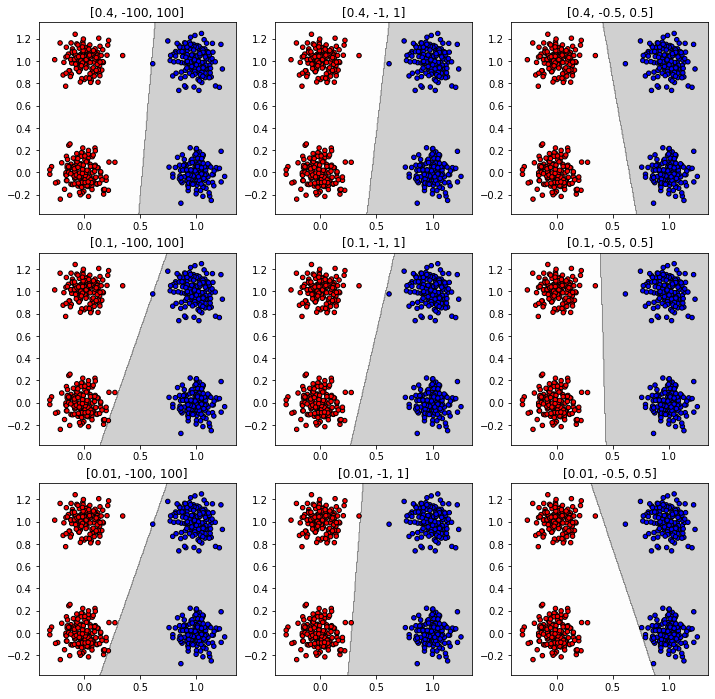

In [5]:
fig = plt.figure(figsize=(12,12))
for k in range(len(configs)):
    print("Configuração: ", configs[k])
    n = Neuron(configs[k][0], configs[k][1], configs[k][2])
    (epoch, fitWeight) = n.iteratedFit(X, y, 100)
    print("Pesos da última iteração: ", n.weightArray)
    ep_mean.append(np.mean(epoch))
    fw_mean.append(np.mean(fitWeight))
    ep_std.append(np.std(epoch))
    fw_std.append(np.std(fitWeight))
    x = []
    line = []
    x = ([i for i in range(-len(data3),len(data3))])
    line = ([(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x])# calcula a reta y = mx + b
    plotConfigs(X,y,x, line, n, configs[k], k+1)


In [6]:
df = pd.DataFrame({ "Config": configs, "Media_Ajustes": fw_mean, "Media_Epocas": ep_mean, "Desvio_Ajustes": fw_std, "Desvio_Epocas": ep_std})
df

,Config,Media_Ajustes,Media_Epocas,Desvio_Ajustes,Desvio_Epocas
0,"[0.4, -100, 100]",324.29,13.53,170.843688,7.473226
1,"[0.4, -1, 1]",8.43,4.02,4.092078,1.191470
2,"[0.4, -0.5, 0.5]",6.99,4.14,3.135267,1.039423
3,"[0.1, -100, 100]",1168.02,48.64,654.251756,34.344874
4,"[0.1, -1, 1]",15.94,4.12,8.358014,1.401999
5,"[0.1, -0.5, 0.5]",11.69,4.08,4.772201,1.238386
6,"[0.01, -100, 100]",11798.36,409.19,6534.321842,331.917872
7,"[0.01, -1, 1]",118.39,6.75,78.146132,2.822676
8,"[0.01, -0.5, 0.5]",59.90,5.44,32.120865,1.920000


Observando-se os valores obtidos no gráfico, e sabendo-se que independente de quaisquer configuração, todas elas convergem para o acerto, como ja fora mostrado em todos os gráficos respectivos a cada configuração. Sendo assim, nota-se que a configuração **[0.01, -100, 100]** é a pior considerando suas médias e desvios, pois em termos de recursos computacionais e de convergência para o resultado correto esta foi a que demandou mais ajustes no vetor de pesos e mais épocas, isso se deve a sua baixa taxa de aprendizado e alta quantidade de valores possíveis para os pesos, tal fato se confirma quando analisamos também outras duas configurações, são elas **[0.1, -100, 100]** e **[0.4, -100, 100]**, mostrando que quando maior o intervalo que os pesos podem assumir de forma aleatória, maior é o tempo, ajustes e processamento que o neurônio demandará da máquina na qual esta sendo treinada.


Continuando a análise em relação a igualdade de configurações, nenhuma delas resulta em uma convergência exatamente equivalente a outra, porém elas são aproximadas, isto se mostra verdade quando analisamos os seus valores de média e desvio na tabela acima, como por exemplo as configurações **[0.4, -1, 1]** e **[0.4, -0.5, 0.5]** que possuem a média de ajustes próximas, a média de épocas igual e os desvios de ajustes de pesos e épocas aproximados. Por fim, em relação a uma melhor configuração e que leve a convergência mais rapidamente, temos a configuração **[0.4, -0.1, 0.1]**, a qual demandou menos ajustes e épocas como visto na tabela, porém isso de certa forma é relativo já que os pesos são gerados automaticamente, pode ser que haja valores entre -0.1 e 0.1 que demandem mais ajustes e épocas para convergir.